In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pre_trained = True

plt.rcParams['figure.figsize'] = [20, 10]

# Feature Analysis

In [2]:
train_label = pd.read_csv("data/train_labels.csv")

In [3]:
#train_label[["QS","QR"]].to_csv("data/train_labels.csv")

In [4]:
train_data = None


if(pre_trained==False) :
    xtrain=pd.read_csv("data/xtrain_challenge.csv")
    train_data = xtrain
    
    cols_qs = list(xtrain.columns)[:13]
    cols_qr = list(xtrain.columns)[13:26]
    cols_S1_11 = list(xtrain.columns)[26:37]
    


    # On créé des features artificielles:
    # Q1-13 Q13-26 sont des identifiants uniques d'un visage
    # On suppose que Q1-13 et Q13-26 pourrait etre inversé
    # On regarde si on n'aurait pas des liaisons à faire en plus

    # Merge des colonnes

    train_data["QS"] = train_data[cols_qs].apply(
        lambda x: '_'.join(x.astype(str)),
        axis=1
    )

    # Merge des colonnes

    train_data["QR"] = train_data[cols_qr].apply(
        lambda x: '_'.join(x.astype(str)),
        axis=1
    )
    train_data['QS'] = train_data['QS'].apply(lambda x: hash(x))
    train_data['QR'] = train_data['QR'].apply(lambda x: hash(x))
    train_data[['QS','QR']].to_csv("data/train_labels.csv")
else:
    train_data = pd.read_csv("data/xtrain_challenge.csv")
    
  
    
cols_qs = list(train_data.columns)[:13]
cols_qr = list(train_data.columns)[13:26]
cols_S1_11 = list(train_data.columns)[26:37]
    

In [5]:
xtrain = train_data
train_data['QS'] = train_label['QS']
train_data['QR'] = train_label['QR']

In [6]:
stds = train_data.std(axis=0)
means = train_data.mean(axis=0)

In [7]:
train_data.head(10)


,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,QS,QR
0,1.0,0.0,0.0,-6.24,-5.27,-1.86,0.63,3.27,0.89,350.98,64.86,0.0,1.00,1.0,0.0,0.0,-9.44,-12.53,0.84,2.59,1.53,1.03,276.02,58.02,0.0,1.00,2405.94,1981.09,2677.84,2470.44,1579.39,2185.79,2118.77,2580.99,2498.04,3180.58,2718.29,-2947736472873946024,4850804678746403934
1,1.0,0.0,0.0,-0.42,-4.50,-4.31,1.61,1.72,2.76,347.06,28.85,0.0,0.99,1.0,0.0,0.0,-0.35,-18.97,-1.31,1.23,0.84,0.34,263.84,30.50,0.0,1.00,3241.37,2015.24,3987.19,3343.53,2894.69,2947.34,2689.42,3763.51,2544.22,3515.58,3247.49,7010587516770762994,-1229094245578364634
2,1.0,0.0,0.0,33.76,-19.29,2.71,1.73,1.32,1.53,135.94,57.65,1.0,0.01,1.0,0.0,0.0,-12.58,-9.99,-0.15,1.21,0.34,1.60,357.67,51.98,1.0,1.00,2199.22,2549.59,2164.41,2100.69,1294.35,2136.04,1644.05,2308.05,1774.88,3005.79,2507.02,2634697240817084763,-7999064945361578191
3,1.0,0.0,0.0,-2.82,-8.04,3.04,0.94,2.92,0.09,288.07,21.23,0.0,0.94,1.0,0.0,0.0,1.57,-13.22,-2.66,1.18,0.23,0.38,268.44,24.59,0.0,0.19,2390.40,2141.75,2086.02,2154.69,1247.48,1903.36,2232.54,2146.34,2201.53,3315.03,2274.76,-5601467435604765038,-126883722278209016
4,1.0,0.0,0.0,3.56,-10.61,-0.65,0.19,1.04,2.10,166.12,37.36,1.0,0.00,1.0,0.0,0.0,20.03,-15.53,-1.21,1.31,0.23,1.25,172.19,26.14,0.0,1.00,1822.14,2202.60,2150.07,2194.25,1575.43,2345.59,1976.82,1440.78,2061.06,2927.96,2073.16,-4708074007791905098,8632530044726314488
5,1.0,0.0,0.0,3.10,-6.27,-2.70,0.20,1.82,1.16,267.62,34.40,0.0,1.00,1.0,0.0,0.0,-10.03,3.83,-1.81,2.62,0.31,0.08,264.94,35.82,0.0,1.00,1654.88,1759.45,2727.66,2253.47,2091.18,2021.04,1963.33,2436.20,2333.33,3034.30,2359.34,1737663910291183138,6549234586971581119
6,1.0,0.0,0.0,-5.08,3.91,-0.47,1.45,0.07,2.15,188.00,36.80,0.0,1.00,1.0,0.0,0.0,0.02,1.34,-2.72,1.80,0.12,0.65,231.98,37.27,0.0,0.00,2320.56,1685.26,2307.06,1939.64,1549.16,2148.36,1590.07,2107.89,2273.71,3169.00,2403.95,-5096065655828643172,8823958765402434150
7,1.0,0.0,0.0,1.52,-6.21,1.53,0.91,0.77,0.65,306.03,32.23,0.0,1.00,1.0,0.0,0.0,0.53,1.49,1.30,0.57,0.18,1.07,404.22,24.13,0.0,1.00,2210.33,1968.06,2738.41,2524.63,2313.01,2096.95,2466.05,2148.19,2413.82,3231.56,2895.45,-7506284411163153247,-4479169395836738349
8,1.0,0.0,0.0,-0.51,9.75,8.86,1.49,0.31,1.29,375.26,43.40,0.0,1.00,1.0,0.0,0.0,2.91,9.49,-8.28,2.17,1.02,0.07,344.02,46.38,0.0,1.00,2180.16,2385.96,2246.63,2169.35,1783.36,1934.03,2355.90,2034.93,2133.04,3286.98,2282.92,-5842000275822462749,4084124269797495146
9,1.0,0.0,0.0,-7.89,-5.71,-12.80,2.28,0.40,1.50,282.73,40.00,0.0,0.00,1.0,0.0,0.0,11.33,-1.36,5.89,3.80,0.32,0.79,263.39,26.94,0.0,0.00,5428.98,4299.10,6658.78,8224.55,6603.65,6599.55,7133.70,6894.58,7169.84,6608.53,6802.31,4335309973425363012,-4916839274729627636


In [8]:
#train_data[train_data.label==1].groupby("QS")

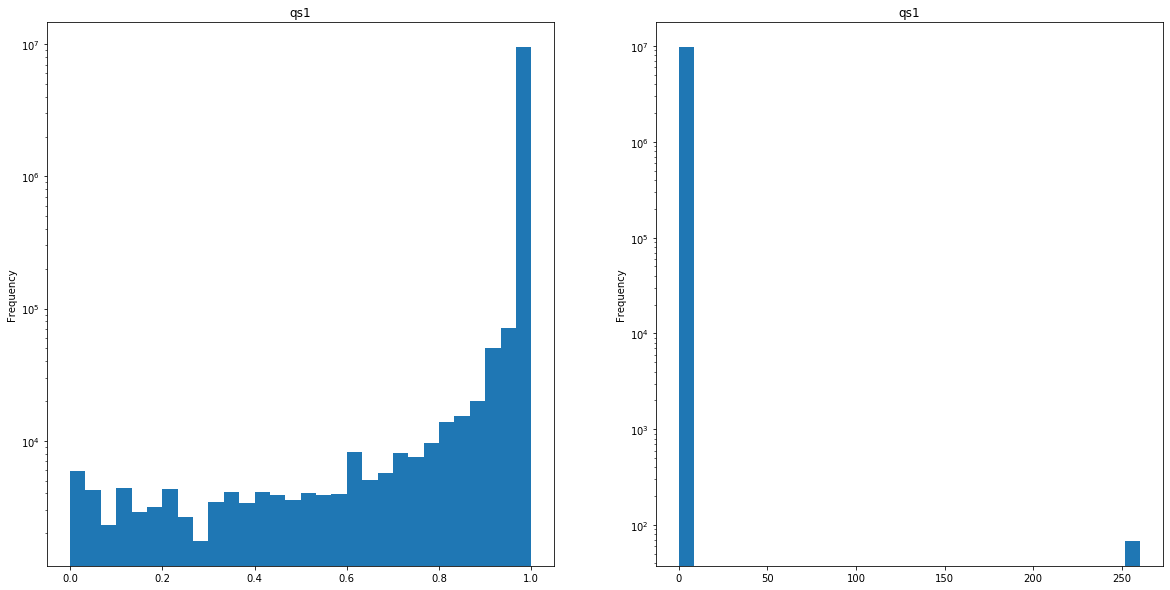

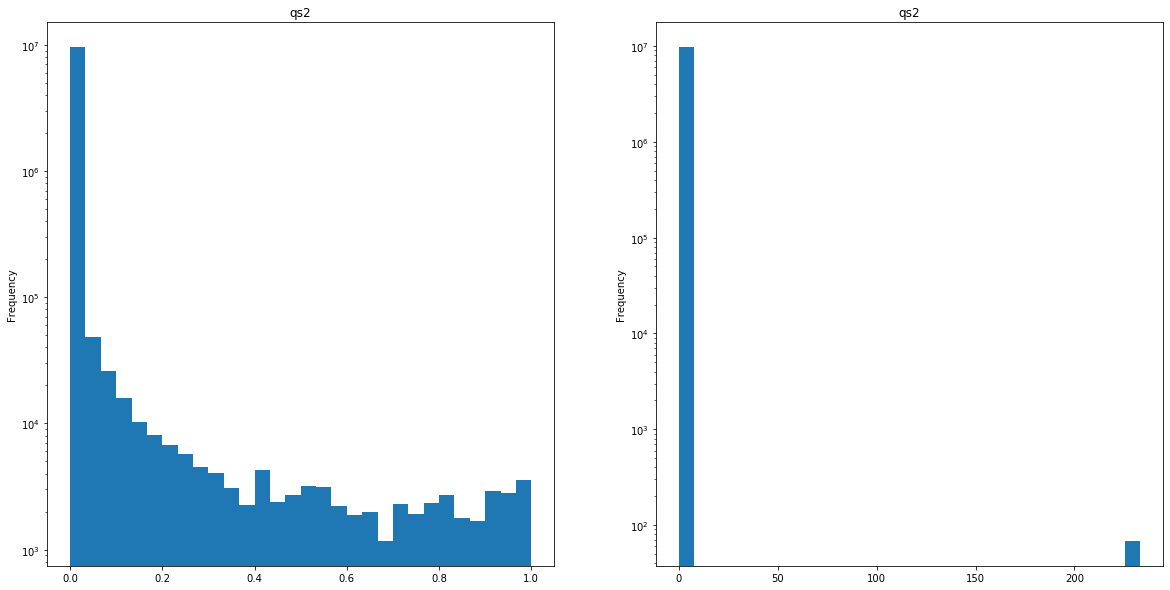

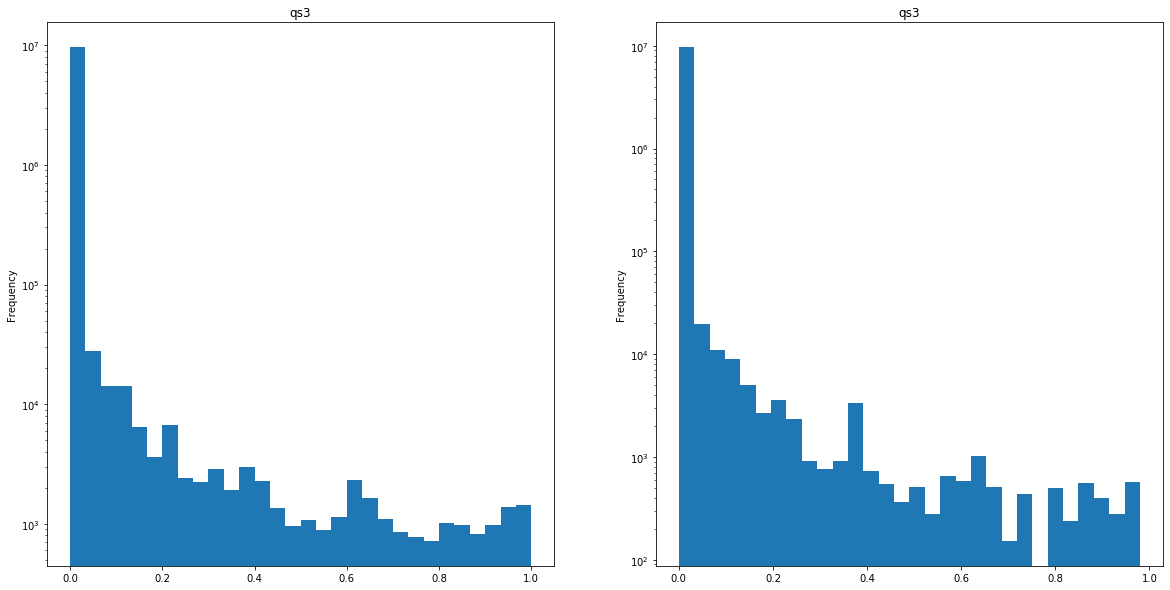

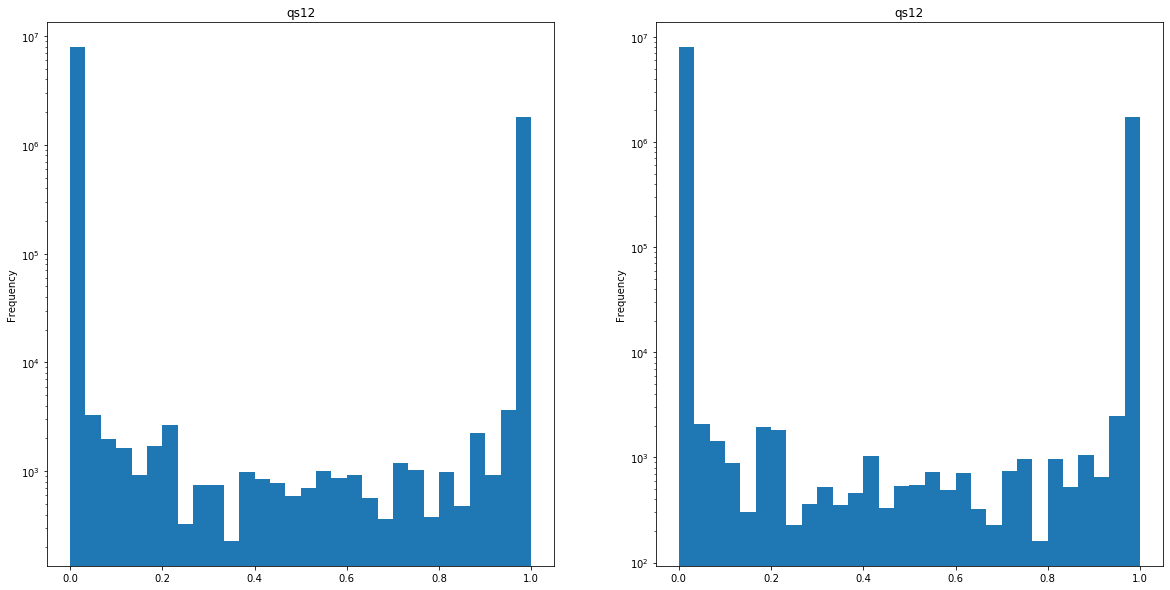

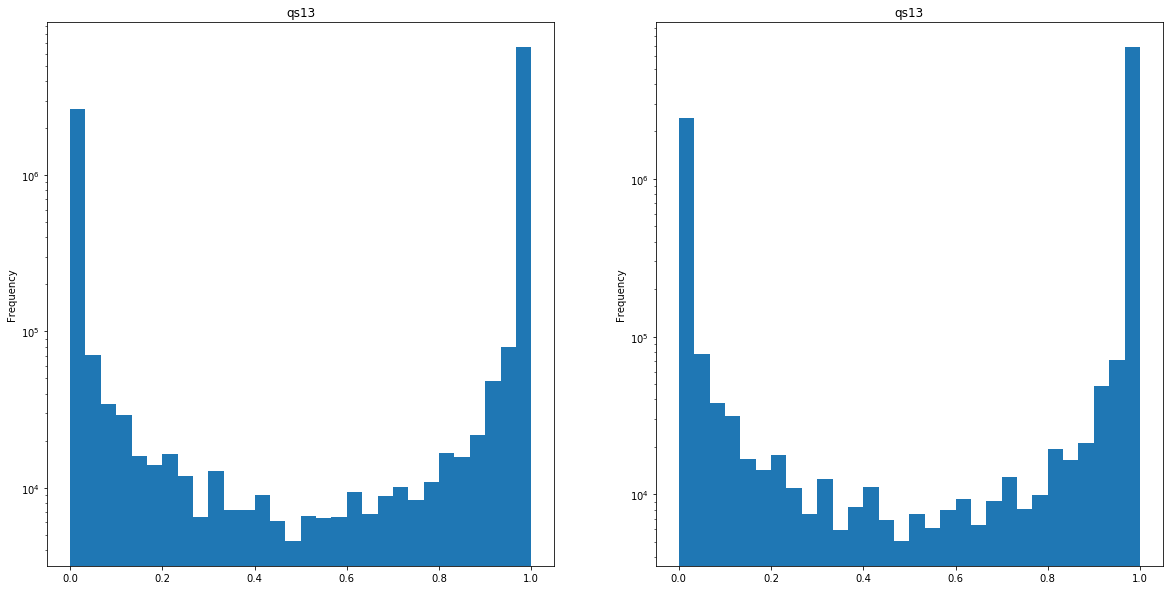

In [9]:
columns_logs = [0,1,2,11,12]
for c in columns_logs:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    xtrain[xtrain.columns[c]].plot(kind='hist', bins=30, logy=True, ax=ax1)
    ax1.set_title(xtrain.columns[c])
    xtrain[xtrain.columns[c+13]].plot(kind='hist', bins=30, logy=True, ax=ax2)
    ax2.set_title(xtrain.columns[c])
    plt.show()


## Remove outliers QR > 1


In [10]:
ytrain=pd.read_csv("data/ytrain_challenge.csv")
print(ytrain[xtrain.qr9 >xtrain.qs9.max()].index)
ytrain[xtrain.qr1 >xtrain.qs1.max()].index

train_outliers = xtrain[xtrain.qr1 >xtrain.qs1.max()]

Int64Index([ 577400,  677237,  898968, 1020653, 1098358, 1156634, 1403846,
            1509577, 1794345, 1859779, 2057997, 2222793, 2276695, 2374728,
            2377340, 2447064, 2639834, 2672871, 2950661, 3378868, 3384105,
            3408287, 3590348, 3676208, 3847084, 4050967, 4430131, 4567893,
            4699926, 4963445, 5392467, 5657494, 5673529, 5694335, 5713847,
            5860201, 5865497, 5975791, 6171119, 6220221, 6439894, 6520108,
            6803659, 6835766, 7020325, 7092669, 7364636, 7400739, 7417855,
            7475328, 7493100, 7577519, 7593318, 8091392, 8153387, 8195445,
            8221333, 8604446, 8644543, 8690307, 8836360, 9172257, 9225340,
            9364429, 9459680, 9546610, 9603310, 9695010],
           dtype='int64')


In [11]:
# Load test data
xtest = pd.read_csv('data/xtest_challenge.csv')

In [12]:
print(xtest[xtest.qr1>1].index)
xtest[xtest.qr9> xtrain.qs9.max()].index


Int64Index([  60324,  186520,  475331,  649230, 1441484, 1928496, 1986754,
            2096911, 2146785, 2238436, 2273552, 2312090, 2317079, 2456671,
            2562144, 2596768, 2647608, 2771058, 2837820, 2975008, 3255777,
            3519410, 3704257],
           dtype='int64')


Int64Index([  60324,  186520,  475331,  649230, 1441484, 1928496, 1986754,
            2096911, 2146785, 2238436, 2273552, 2312090, 2317079, 2456671,
            2562144, 2596768, 2647608, 2771058, 2837820, 2975008, 3255777,
            3519410, 3704257],
           dtype='int64')

In [13]:
# Check QR Values of xtest
test_outliers = xtest[xtest.qr9> xtrain.qs9.max()]
test_outliers[['qr11','qr12','qr13']].sort_values(by='qr11')

,qr11,qr12,qr13
2975008,21.09,0.0,1.00
2596768,22.17,1.0,1.00
2273552,22.39,0.0,1.00
2562144,22.61,0.0,1.00
2837820,23.09,0.0,0.00
60324,24.55,0.0,0.00
3704257,24.77,0.0,0.01
2238436,26.31,0.0,0.93
1928496,26.61,0.0,0.00
1441484,26.72,0.0,0.06


In [14]:
train_outliers[['qr11','qr12','qr13']].sort_values(by='qr11').head(68)

,qr11,qr12,qr13
1098358,20.03,0.0,0.01
2950661,20.91,0.0,0.00
2374728,21.52,0.0,1.00
2377340,21.53,0.0,1.00
5673529,21.53,1.0,0.10
...,...,...,...
7493100,35.99,1.0,1.00
577400,36.84,0.0,1.00
2639834,39.43,1.0,1.00
9172257,40.06,0.0,0.00


In [15]:
train_outliers[cols_qs]

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13
577400,1.0,0.0,0.0,0.63,-1.71,1.62,0.85,0.90,0.46,377.56,38.99,0.0,1.00
677237,1.0,0.0,0.0,2.00,-10.40,-0.78,0.95,0.06,1.44,259.18,25.50,1.0,0.29
898968,1.0,0.0,0.0,-0.50,2.10,-1.01,0.43,0.13,0.22,389.39,24.52,1.0,0.54
1020653,1.0,0.0,0.0,7.02,-14.99,-3.06,2.52,1.42,0.16,-27.56,21.57,0.0,1.00
1098358,1.0,0.0,0.0,0.69,-3.18,-4.97,1.17,1.36,0.20,225.65,23.46,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364429,1.0,0.0,0.0,2.82,-9.28,-1.66,0.58,1.06,0.32,239.34,27.60,0.0,0.09
9459680,1.0,0.0,0.0,-1.48,-2.13,0.08,1.10,1.15,0.68,376.84,46.02,0.0,1.00
9546610,1.0,0.0,0.0,-0.44,-11.22,-1.67,2.73,1.28,0.33,219.10,23.98,1.0,0.95
9603310,1.0,0.0,0.0,0.80,-18.22,0.96,1.20,2.45,0.21,99.32,22.80,0.0,0.99


In [16]:
train_outliers[cols_qr]

,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13
577400,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,36.84,0.0,1.00
677237,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,23.20,1.0,0.96
898968,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,28.07,1.0,0.02
1020653,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,24.45,0.0,0.00
1098358,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,20.03,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364429,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,23.20,0.0,0.00
9459680,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,30.25,0.0,1.00
9546610,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,26.45,1.0,0.99
9603310,260.25,233.13,0.0,51.08,0.0,0.0,0.0,0.0,145.21,1611.47,25.81,1.0,1.00


NameError: name 'xtrain_clean' is not defined

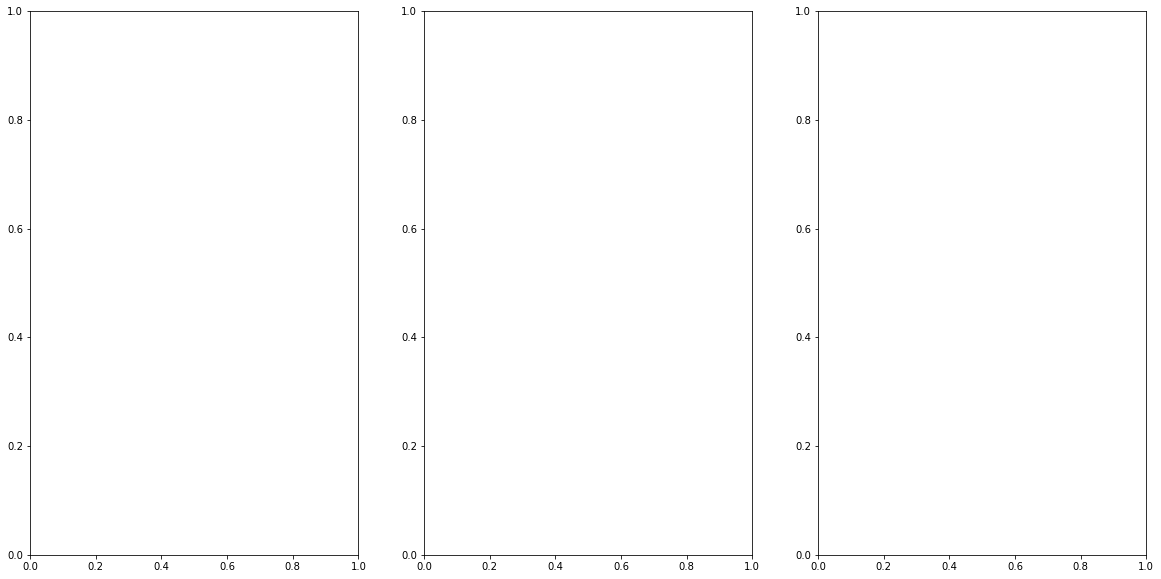

In [17]:
columns_logs = [0,1,2,11,12]
for c in columns_logs:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    xtrain_clean[xtrain.columns[c]].plot(kind='hist', bins=30, logy=True, ax=ax1)
    ax1.set_title(xtrain.columns[c])
    xtrain_clean[xtrain.columns[c+13]].plot(kind='hist', bins=30, logy=True, ax=ax2)
    ax2.set_title(xtrain.columns[c])
    (xtrain_clean[xtrain.columns[c]]-xtrain_clean[xtrain.columns[c+13]]).plot(kind='hist', bins=30, logy=True, ax=ax3)
    ax2.set_title("Deltas")
    plt.show()

In [17]:
train_data.describe()

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,QS,QR
count,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06,9.800713e+06
mean,9.918364e-01,5.252516e-03,2.858537e-03,-2.243750e-01,-5.766788e+00,-7.422710e-01,1.264598e+00,9.991708e-01,8.592701e-01,2.561005e+02,3.765261e+01,1.873179e-01,7.033070e-01,9.973434e-01,4.288885e-03,1.506325e-03,-2.001280e-01,-5.787821e+00,-7.621272e-01,1.220221e+00,9.554807e-01,8.160231e-01,2.685604e+02,3.806021e+01,1.780925e-01,7.260753e-01,2.421924e+03,2.294543e+03,2.619504e+03,2.646181e+03,2.337435e+03,2.476213e+03,2.364234e+03,2.441249e+03,2.740128e+03,3.306104e+03,2.717576e+03,-1.279529e+16,7.690839e+14
std,6.377177e-02,5.143305e-02,3.607721e-02,9.952588e+00,8.868902e+00,4.565691e+00,1.158636e+00,8.948037e-01,7.733346e-01,7.512713e+01,1.340483e+01,3.895149e-01,4.488369e-01,6.843035e-01,6.149545e-01,2.342733e-02,8.445116e+00,8.351429e+00,4.387539e+00,1.095457e+00,8.642092e-01,8.188959e-01,7.496497e+01,1.359784e+01,3.821111e-01,4.375053e-01,1.036611e+03,9.535095e+02,1.260018e+03,1.392760e+03,1.713471e+03,1.206693e+03,1.411610e+03,1.382010e+03,1.361459e+03,8.474081e+02,1.207085e+03,5.296849e+18,5.325257e+18
min,0.000000e+00,0.000000e+00,0.000000e+00,-7.820000e+01,-6.771000e+01,-3.482000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.980000e+02,1.842000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.476000e+01,-4.213000e+01,-2.640000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.980000e+02,1.846000e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.100200e+02,6.218300e+02,9.835100e+02,2.093700e+02,6.692100e+02,3.280800e+02,4.528300e+02,1.238680e+03,2.160870e+03,1.123050e+03,-9.223320e+18,-9.223371e+18
25%,1.000000e+00,0.000000e+00,0.000000e+00,-3.220000e+00,-1.263000e+01,-2.850000e+00,4.700000e-01,3.500000e-01,3.100000e-01,2.112600e+02,2.580000e+01,0.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,-2.580000e+00,-1.242000e+01,-2.750000e+00,4.500000e-01,3.300000e-01,2.900000e-01,2.246100e+02,2.578000e+01,0.000000e+00,4.000000e-02,1.895080e+03,1.778460e+03,2.021020e+03,2.022190e+03,1.592700e+03,1.900850e+03,1.722640e+03,1.799490e+03,2.162600e+03,2.926560e+03,2.170650e+03,-4.574792e+18,-4.611932e+18
50%,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e-02,-4.870000e+00,-6.000000e-01,1.000000e+00,7.600000e-01,6.700000e-01,2.641500e+02,3.449000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e-02,-4.910000e+00,-6.400000e-01,9.600000e-01,7.200000e-01,6.400000e-01,2.774100e+02,3.521000e+01,0.000000e+00,1.000000e+00,2.150870e+03,2.045510e+03,2.278870e+03,2.254630e+03,1.891180e+03,2.143050e+03,1.986900e+03,2.074420e+03,2.367710e+03,3.072890e+03,2.386120e+03,-9.725868e+15,3.995241e+14
75%,1.000000e+00,0.000000e+00,0.000000e+00,3.140000e+00,9.600000e-01,1.430000e+00,1.740000e+00,1.380000e+00,1.190000e+00,3.091400e+02,4.807000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.610000e+00,7.600000e-01,1.240000e+00,1.690000e+00,1.320000e+00,1.130000e+00,3.216900e+02,4.895000e+01,0.000000e+00,1.000000e+00,2.508110e+03,2.425350e+03,2.650590e+03,2.599260e+03,2.306540e+03,2.500040e+03,2.360030e+03,2.461890e+03,2.659910e+03,3.283640e+03,2.698510e+03,4.549523e+18,4.616668e+18
max,1.000000e+00,1.000000e+00,1.000000e+00,5.934000e+01,2.668000e+01,6.482000e+01,3.873000e+01,1.568000e+01,2.442000e+01,4.704700e+02,7.677000e+01,1.000000e+00,1.000000e+00,2.602500e+02,2.331300e+02,9.800000e-01,5.108000e+01,2.277000e+

In [5]:
cols_active = list(train_data.columns)[:]

remove_list=["QS","QR", "qs1","qr1","qs2","qr2","qs3","qr3","qs13","qr13","qs12","qr12"]    
for i in remove_list: 
    try: 
        if i in cols_qr:
            cols_qr.remove(i) 
        if i in cols_qs:
            cols_qs.remove(i)
        if i in cols_active:
            cols_active.remove(i)
    except ValueError: 
        pass
cols_active

['qs4',
 'qs5',
 'qs6',
 'qs7',
 'qs8',
 'qs9',
 'qs10',
 'qs11',
 'qr4',
 'qr5',
 'qr6',
 'qr7',
 'qr8',
 'qr9',
 'qr10',
 'qr11',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11']

In [19]:

def distance_canberra_mat(d1, d2):
    ### Don't seems to work in scipy    
    divide = abs(d1) + abs(d2)    
    distance = np.sum(np.divide(abs(d1-d2), divide, where=divide!=0), axis=1)    
    return distance
    
def distance_cosine_mat(d1, d2):
    ### Don't seems to work in scipy
    val = np.sum(d1*d2, axis=1)
    divide = np.sqrt(np.sum((d1*d1), axis=1))*np.sqrt(np.sum((d2*d2), axis=1))
    return 1 - np.divide(val, divide)

def distance_khi2_mat_w(d1, d2, w):
    divide = (d1 + d2)*w    
    distance = np.sum(np.divide((d1-d2)**2, divide, where=divide!=0), axis=1)   
    return distance

def distance_khi2_mat(d1, d2):
    divide = d1 + d2    
    distance = np.sum(np.divide((d1-d2)**2, divide, where=divide!=0), axis=1)   
    return distance


def distance_braycurtis_mat(d1, d2):
    divide = np.sum(abs(d1 + d2), axis=1)
    distance = np.divide(np.sum(abs(d1-d2), axis=1), divide)   
    return distance


def distance_eucl_mat(d1, d2):
    distance = np.sqrt(np.sum((d1-d2)**2, axis=1))   
    return distance

In [20]:
train_data["canberra"]=distance_canberra_mat(train_data[cols_qr].values, train_data[cols_qs].values)
train_data["cosine"]=distance_cosine_mat(train_data[cols_qr].values, train_data[cols_qs].values)
train_data["khi2"]=distance_khi2_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["braycurtis"]=distance_braycurtis_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["euclidian"]=distance_eucl_mat(train_data[cols_qr].values,train_data[cols_qs].values)



In [21]:
xtest["canberra"]=distance_canberra_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["cosine"]=distance_cosine_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["khi2"]=distance_khi2_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["braycurtis"]=distance_braycurtis_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["euclidian"]=distance_eucl_mat(xtest[cols_qr].values,xtest[cols_qs].values)

In [ ]:
xtest.describe()

On va calculer des distances entre les features Q1-13 et Q13-26

https://www.cs.toronto.edu/~ranzato/publications/taigman_cvpr14.pdf


In [ ]:
# Calcul d'un SVM pour connaitre les coefficients des features

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()

d1 = train_data[cols_qs].values
d2 = train_data[cols_qr].values

divide = d1 + d2 
X = np.divide((d1-d2)**2, divide, where=divide!=0)

X_SVM, X_SVM_test, y_SVM, y_SVM_test = train_test_split(X, ytrain, test_size=0.98) # SVM on 2% of data

X_SVM.shape

In [ ]:
clf.fit(X_SVM, y_SVM)

In [ ]:
w = clf.coef_

In [ ]:
xtest["khi2 W"]=distance_khi2_mat_w(xtest[cols_qr].values,xtest[cols_qs].values, w)
train_data["khi2_W"]=distance_khi2_mat_w(train_data[cols_qr].values,train_data[cols_qs].values,w)

In [ ]:
ytrain[xtrain.qr9 >xtrain.qs9.max()].index

In [ ]:
ytrain[xtrain.qr1 >xtrain.qs1.max()].index

In [ ]:
xtest[xtest.qr1>1].index

In [ ]:
xtest[xtest.qr9> xtrain.qs9.max()].index

In [ ]:
xtrain_clean = xtrain[xtrain.qr1<=1]



In [ ]:
xtrain_clean.describe()

In [ ]:
qs_unique =len(xtrain_clean.QS.unique())

##### for c in list(xtrain_clean.columns):
    xtrain_clean[c].plot(kind='hist', bins=30, logy=True)   
    plt.title(c)
    plt.show()    
    xtrain_clean[c].plot(kind='hist', bins=30)
    plt.title(c)
    plt.show()

In [ ]:
len(xtrain_clean.QR.unique())

In [ ]:
ytrain_clean = ytrain[xtrain.qr1 <=1]
#qs_unique = len(xtrain_clean[ytrain_clean==1].QS.unique())


qs_unique




In [ ]:


choosen = sk.utils.random.sample_without_replacement(qs_unique,qs_unique//8)

# get the hash of the data
qs = xtrain_clean.QS.iloc[choosen].values

In [ ]:
indices = np.in1d(xtrain_clean.QS.values, qs)

In [ ]:
xtrain_clean.QS[indices].count()

In [ ]:

#X_train, X_test, y_train, y_test = train_test_split(xtrain_clean, ytrain[xtrain.qr1 <=1], test_size=0.33, random_state=42)

X_train= xtrain_clean[~indices]
X_test=xtrain_clean[indices]
y_train= ytrain_clean[~indices]
y_test=ytrain_clean[indices]


In [ ]:
X_train.shape

In [42]:

import tensorflow as tf
#physical_devices = tf.config.experimental.list_physical_devices('GPU') 
#print("Num GPUs:", len(physical_devices)) 

def score(y_true, y_pred):
    yvalid_scoreordered = y_true[np.argsort(y_pred)]
    N = np.sum(y_true == 0)
    P = np.sum(y_true == 1)
    FP = 0.0
    TP = 0.0
    val = 0
    for i in range(len(y_true) - 1, -1, -1):        
        if (yvalid_scoreordered[i] == 1):
            TP = TP + 1
        else:
            FP = FP + 1
        if (FP / N > 10**-4):
            FP = FP - 1
            break
    print("For the smallest FPR <= 10^-4 (i.e., ", FP / N, ") TPR = ", TP / P, ".", sep = "")
    return TP/N

class EvaluateEndEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        yvalid = self.model.predict(X_test[cols_active].values,batch_size=1024)[:,0]
        score(y_test.values ,yvalid)
        
        
model = tf.keras.models.Sequential([  
    tf.keras.layers.Dense(500,activation='relu'),    
    tf.keras.layers.Dense(500, activation='relu'),    
    tf.keras.layers.Dense(100, activation='relu'),    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])


model.fit(X_train[cols_active].values, y_train.values, epochs=50, batch_size=1024,steps_per_epoch=1024,callbacks=[EvaluateEndEpoch()])


Train on 7295689 samples
Epoch 1/50
 251904/7295689 [>.............................] - ETA: 9:59 - loss: 6.3875 - binary_accuracy: 0.9279

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 681, in on_epoch
    yield epoch_logs
  File "C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 86, in execution_function
    distributed_function(input_fn))
  File "C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\eager\def_function.py", line 457, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\martine


KeyboardInterrupt



In [43]:
for i in range(len(cols_qr)):
    X_train["diff"+str(i)]= X_train[cols_qr[i]] - X_train[cols_qs[i]]
    X_test["diff"+str(i)]= X_test[cols_qr[i]] - X_test[cols_qs[i]]

C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\martinez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
cols_active = list(X_train.columns)[:]

remove_list=["QS","QR", "qs1","qr1","qs2","qr2","qs3","qr3","qs13","qr13","qs12","qr12"]    
for i in (cols_qr+cols_qs+remove_list): 
    try:
        if i in cols_active:
            cols_active.remove(i)
    except ValueError: 
        pass
cols_active

['s1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 'canberra',
 'cosine',
 'khi2',
 'braycurtis',
 'euclidian',
 'khi2_W',
 'diff0',
 'diff1',
 'diff2',
 'diff3',
 'diff4',
 'diff5',
 'diff6',
 'diff7']

In [47]:

import lightgbm 
# making lgbm datasets for train and valid
d_train = lightgbm.Dataset(X_train[cols_active], y_train)
d_valid = lightgbm.Dataset(X_test[cols_active], y_test)
    
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 250,
    'max_bin':1024,
    'feature_fraction': 1,
    'bagging_fraction': 0.3,
    'bagging_freq': 5,
    'learning_rate': 0.1,
    'reg_lambda':0.02,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       d_train,
                       valid_sets=d_valid,
                       num_boost_round=300,
                       early_stopping_rounds=60)   
    # making prediciton for one column


MemoryError: Unable to allocate 2.77 GiB for an array with shape (51, 7295689) and data type float64

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 250,
    'max_bin':1024,
    'feature_fraction': 1,
    'bagging_fraction': 0.3,
    'bagging_freq': 5,
    'learning_rate': 0.05,
    'verbose': 1
}

model = lightgbm.train(parameters,
                       d_train,
                       valid_sets=d_valid,
                       num_boost_round=5000,
                       early_stopping_rounds=300, init_model=model
                      ) 

In [64]:
model.save_model('lgbm_all_0.00112.model')

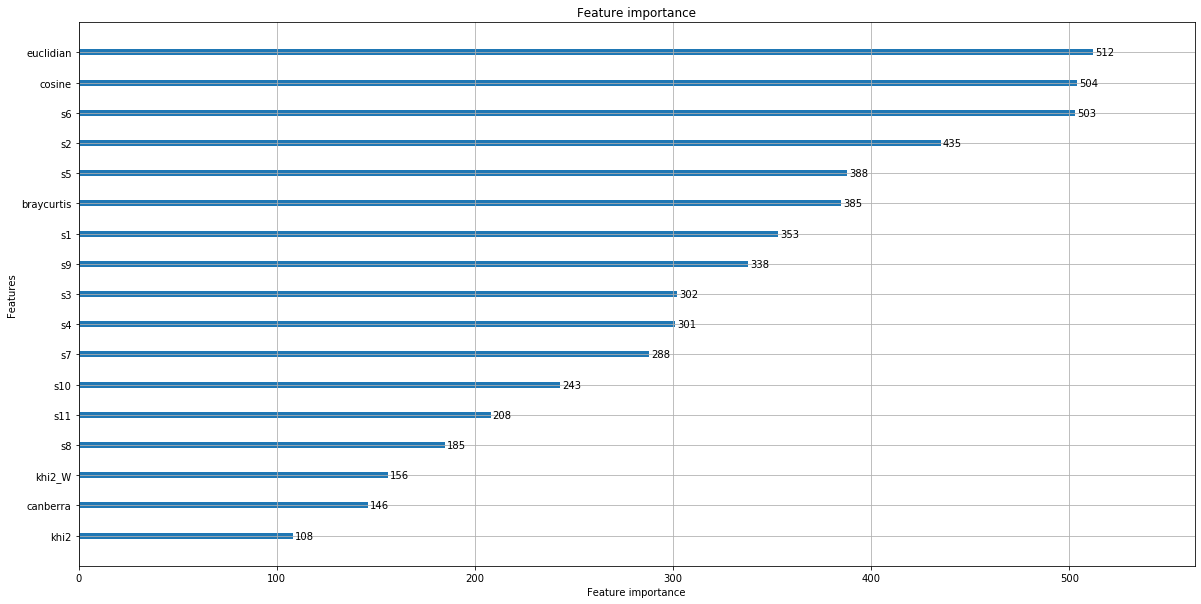

In [58]:

plt.rcParams['figure.figsize'] = [20, 10]
lightgbm.plot_importance(model)

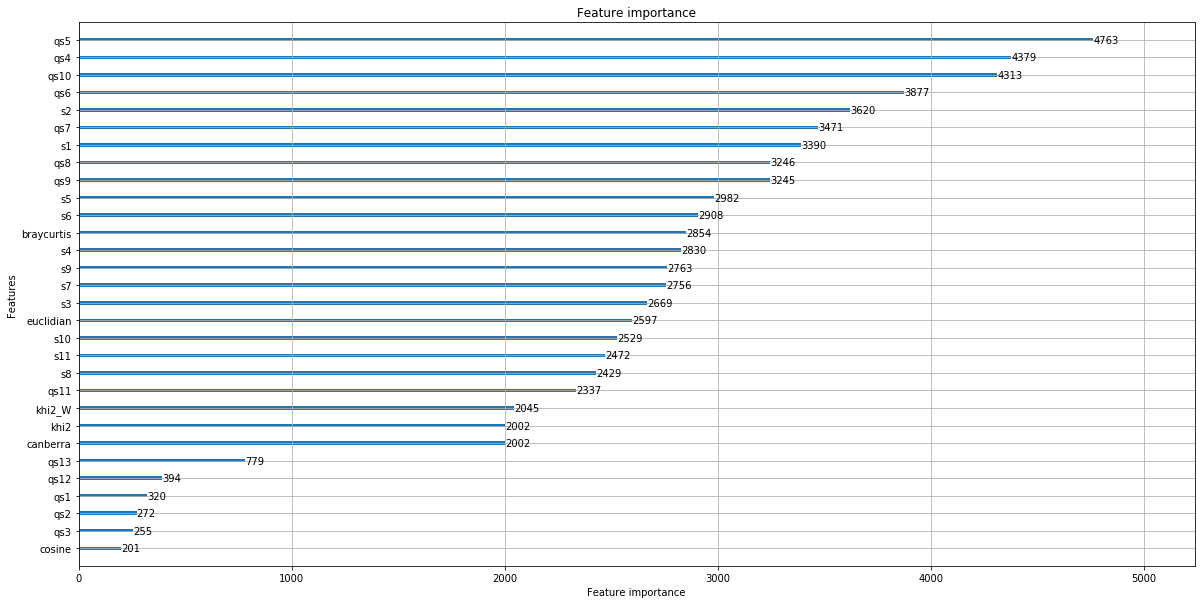

In [34]:

plt.rcParams['figure.figsize'] = [20, 10]
lightgbm.plot_importance(model)

In [35]:
#model.save_model('lgbm_distance.txt')

soft = model.predict(X_test)

print('Fininshed Training')
soft

Fininshed Training


array([1.05091798e-05, 1.17322523e-05, 6.16622254e-07, ...,
       2.22527483e-06, 6.69066307e-07, 9.99980926e-01])

In [36]:

yvalid = soft

In [37]:
N = np.sum(y_test == 0).values
P = np.sum(y_test == 1).values



In [38]:

yvalid_scoreordered = y_test.values[np.argsort(yvalid)]


FP = 0.0
TP = 0.0
val = 0
print(N)
print(P)
for i in range(len(y_test) - 1, -1, -1):        
    if (yvalid_scoreordered[i] == 1):
        TP = TP + 1
    else:
        FP = FP + 1
        #print(X_test[cols].iloc(i))
    if (FP / N > 10**-4):
        FP = FP - 1
        break
print("For the smallest FPR <= 10^-4 (i.e., ", FP / N, ") TPR = ", TP / P, ".", sep = "")

[2226582]
[240858]
For the smallest FPR <= 10^-4 (i.e., [9.970439e-05]) TPR = [0.98357538].


In [39]:
# Load test data
xtest = pd.read_csv('data/xtest_challenge.csv')
xtest["canberra"]=distance_canberra_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["cosine"]=distance_cosine_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["khi2"]=distance_khi2_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["braycurtis"]=distance_braycurtis_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["euclidian"]=distance_eucl_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["khi2_W"]=distance_khi2_mat_w(xtest[cols_qr].values,xtest[cols_qs].values,w)

In [40]:

# Classify the provided test data
ytest = model.predict(xtest.values)
print(ytest.shape)
np.savetxt('ytest_lbgm_distance.csv', ytest, fmt = '%1.15f', delimiter=',')

(3768311,)


In [5]:
xtest = pd.read_csv('data/xtest_challenge.csv')
    # Merge des colonnes

xtest["QS"] = xtest[cols_qs].apply(
        lambda x: '_'.join(x.astype(str)),
        axis=1
    )

    # Merge des colonnes

xtest["QR"] = xtest[cols_qr].apply(
        lambda x: '_'.join(x.astype(str)),
        axis=1
    )
xtest['QS'] = xtest['QS'].apply(lambda x: hash(x))
xtest['QR'] = xtest['QR'].apply(lambda x: hash(x))
xtest[['QS','QR']].to_csv("data/test_labels.csv")

In [17]:
indice = np.in1d(train_data.QR.values, xtest.QS.values)

In [18]:
train_data.QS.iloc[indice].count()

0